Coding Etiquette (Part 1)

Table Of Contents:
Import Libraries and Dataframes

Create regional segmentation of data

Create an exclusion flag for low-activity customers

Generate Customer profiling Variables

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

Region and Department based comparison between customer profiles

Determine whether there’s a difference in spending habits between the different U.S. regions

Visualizations

Export Data

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Create a path
path =r'C:\Users\beaac\Instacart Basket 25'

In [8]:
# Importing Dataframe
df_merged= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [10]:
# Verify imported df
df_merged.head(5)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,Region
0,0,2539329,1,1,2,8,0.0,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,0,2539329,1,1,2,8,0.0,14084,2,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,0,2539329,1,1,2,8,0.0,12427,3,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,0,2539329,1,1,2,8,0.0,26088,4,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,0,2539329,1,1,2,8,0.0,26405,5,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


Create regional segmentation of the data by creating a Region column based on the Satate column from the dataframe

In [13]:
# Northeast Region - allocating division 1 and 2 (using information from wikipedia )
# Division 1
df_merged.loc[df_merged['state'] == 'Maine', 'Region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'New Hampshire', 'Region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Vermont', 'Region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Massachusetts', 'Region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Rhode Island', 'Region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Connecticut', 'Region'] = 'Northeast'
# Division 2
df_merged.loc[df_merged['state'] == 'New York', 'Region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'Pennsylvania', 'Region'] = 'Northeast'
df_merged.loc[df_merged['state'] == 'New Jersey', 'Region'] = 'Northeast'


In [15]:
# Midwest Region -allocating division 3 and 4 (using information from wikipedia)
# Division 3
df_merged.loc[df_merged['state'] == 'Wisconsin', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Michigan', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Illinois', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Indiana', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Ohio', 'Region'] = 'Midwest'
# Division 4
df_merged.loc[df_merged['state'] == 'North Dakota', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'South Dakota', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Nebraska', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Kansas', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Minnesota', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Iowa', 'Region'] = 'Midwest'
df_merged.loc[df_merged['state'] == 'Missouri', 'Region'] = 'Midwest'

In [17]:
# South Region - allocating division 5,6 and 7 (using information from wikipedia)
df_merged.loc[df_merged['state'] == 'Delaware', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Maryland', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'District of Columbia', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Virginia', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'West Virginia', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'North Carolina', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'South Carolina', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Georgia', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Florida', 'Region'] = 'South'
# Division 6
df_merged.loc[df_merged['state'] == 'Kentucky', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Tennessee', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Mississippi', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Alabama', 'Region'] = 'South'
# Division 7
df_merged.loc[df_merged['state'] == 'Oklahoma', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Texas', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Arkansas', 'Region'] = 'South'
df_merged.loc[df_merged['state'] == 'Louisiana', 'Region'] = 'South'

In [18]:
# West Region - allocating division 8 and 9 (using information from wikipedia)
# Division 8
df_merged.loc[df_merged['state'] == 'Idaho', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'Montana', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'Wyoming', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'Nevada', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'Utah', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'Colorado', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'Arizona', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'New Mexico', 'Region'] = 'West'
# Division 9
df_merged.loc[df_merged['state'] == 'Alaska', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'Washington', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'Oregon', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'California', 'Region'] = 'West'
df_merged.loc[df_merged['state'] == 'Hawaii', 'Region'] = 'West'

In [19]:
# Verify the allocation of the Region column 
df_merged.head(5)

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,Region
0,0,2539329,1,1,2,8,0.0,196,1,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,0,2539329,1,1,2,8,0.0,14084,2,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,0,2539329,1,1,2,8,0.0,12427,3,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,0,2539329,1,1,2,8,0.0,26088,4,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,0,2539329,1,1,2,8,0.0,26405,5,0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [23]:
#Evaluate differences in spending habits across different regions
Crosstab= pd.crosstab(df_merged['Region'],df_merged['income'],dropna= False)

In [24]:
#copy output to the clipboard
Crosstab.to_clipboard()

In [25]:
# Export updated df
df_merged.to_pickle(os.path.join(path,'02 data', 'Prepared data', 'orders_products_customers_merged.pkl'))

Create an exclusion flag for low-activity customers

In [29]:
# Create a exclusion flag for the low activity customers(less than 5 orders)
df_merged.loc[df_merged['max_order'] < 5, 'Customer_Activity'] = 'LOW'
df_merged.loc[df_merged['max_order'] >= 5, 'Customer_Activity'] = 'HIGH'

In [32]:
# Verify customer activity column
df_merged.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,Region,Customer_Activity
0,0,2539329,1,1,2,8,0.0,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,HIGH
1,0,2539329,1,1,2,8,0.0,14084,2,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,HIGH
2,0,2539329,1,1,2,8,0.0,12427,3,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,HIGH
3,0,2539329,1,1,2,8,0.0,26088,4,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,HIGH
4,0,2539329,1,1,2,8,0.0,26405,5,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,HIGH


In [34]:
# count of the customer activity column
df_merged['Customer_Activity'].value_counts(dropna = False)

Customer_Activity
HIGH    30964564
LOW      1440295
Name: count, dtype: int64

In [36]:
# Exclude the low activity customers from the df
df_merged_change= df_merged[df_merged['Customer_Activity'] !='LOW']

In [38]:
#export the updated df
df_merged_change.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_activity_Customers.pkl'))

Create a profiling variable based on age, income, certain goods and number of dependants.

In [40]:
#Customer profiling based on age 
df_merged_change.loc[df_merged_change['age']<= 25, 'Age Group']= 'Youth'
df_merged_change.loc[(df_merged_change ['age']> 25) & (df_merged_change['age'] <= 64), 'Age Group'] = 'Adults'
df_merged_change.loc[df_merged_change['age'] > 64, 'Age Group'] = 'Senior'

C:\Users\beaac\AppData\Local\Temp\ipykernel_3320\3394470572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_change.loc[df_merged_change['age']<= 25, 'Age Group']= 'Youth'


In [43]:
# check Age group account
Age_group_count = df_merged_change[ 'Age Group'].value_counts(dropna= False)

In [45]:
Age_group_count

Age Group
Adults    18904502
Senior     8195544
Youth      3864518
Name: count, dtype: int64

In [47]:
# Customer profiling basd on income
df_merged_change.loc[df_merged_change['income'] <= 50000, 'Income Group'] = 'LOW'
df_merged_change.loc[(df_merged_change['income'] > 50000) & (df_merged_change['income'] <= 150000), 'Income Group'] = 'MIDDLE'
df_merged_change.loc[df_merged_change['income'] > 150000, 'Income Group'] = 'HIGH'

C:\Users\beaac\AppData\Local\Temp\ipykernel_3320\2229663064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_change.loc[df_merged_change['income'] <= 50000, 'Income Group'] = 'LOW'


In [49]:
# Check Income count
Income_group_count= df_merged_change ['Income Group'].value_counts(dropna = False)

In [51]:
Income_group_count

Income Group
MIDDLE    23707476
HIGH       3894534
LOW        3362554
Name: count, dtype: int64

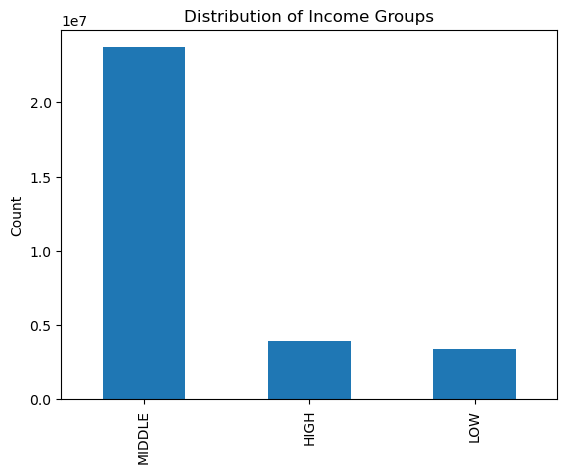

In [55]:
# Visualize a bar chart 
IncomeGroup_BarChart = Income_group_count.plot.bar()  
plt.title('Distribution of Income Groups')
# Hide the y-label
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [57]:
# Export the bar chart
IncomeGroup_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'IncomeGroup_BarChart.png'))

In [59]:
df_merged_change.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'match', 'prices_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       '_merge', 'Region', 'Customer_Activity', 'Age Group', 'Income Group'],
      dtype='object')

In [61]:
# Customer profiling based on dependents
df_merged_change.loc[df_merged_change['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'
df_merged_change.loc[df_merged_change['n_dependants'] >= 1, 'dependents_flag'] = 'Has Dependents'

C:\Users\beaac\AppData\Local\Temp\ipykernel_3320\2610378552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_change.loc[df_merged_change['n_dependants'] == 0, 'dependents_flag'] = 'No Dependents'


In [63]:
# check dependents count
n_dependents_count= df_merged_change ['dependents_flag']. value_counts(dropna = False)

In [65]:
n_dependents_count

dependents_flag
Has Dependents    23224883
No Dependents      7739681
Name: count, dtype: int64

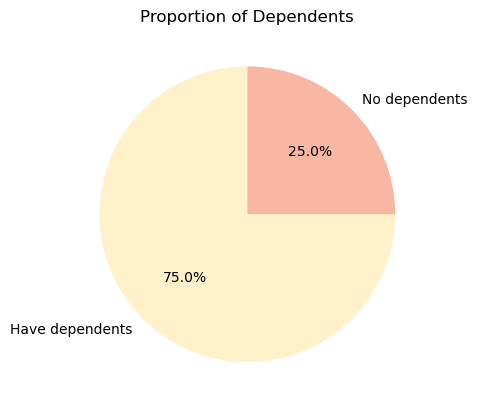

In [69]:
# Visualize a pie chart
DependentGroup_PieChart = n_dependents_count.plot.pie(autopct='%1.1f%%', labels= ['Have dependents', 'No dependents'], startangle=90, colors=['#FFF1C9','#F7B7A3'])
# Hide the y-label
plt.ylabel('')  
plt.title('Proportion of Dependents')
plt.show()

In [71]:
# Export the pie chart
DependentGroup_PieChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'DependentGroup_PieChart.png'))

Using crosstab on spending flag and Age Group


In [74]:
Crosstab_SpenderAgeGroup = pd.crosstab(df_merged_change['spending_flag'], df_merged_change['Age Group'],dropna = False)

In [75]:
Crosstab_SpenderAgeGroup

Age Group,Adults,Senior,Youth
spending_flag,,,
High spender,372537,156886,74002
Low spender,18531965,8038658,3790516


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

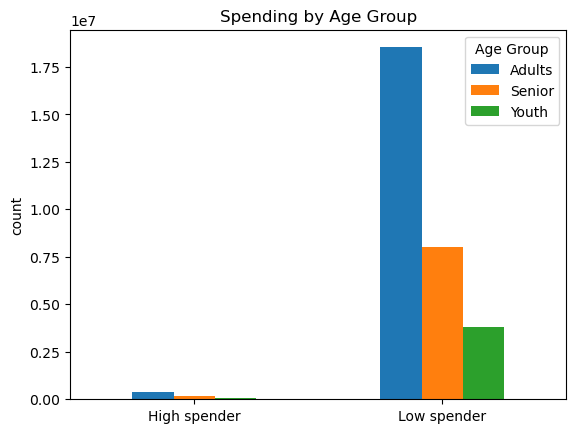

In [78]:
#Visulaize a bar chart for the crosstab betwwen spending and age group
SpenderAgeGroup_BarChart = Crosstab_SpenderAgeGroup.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [80]:
# Export the Bar Chart
SpenderAgeGroup_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'SpenderAgeGroup_BarChart.png'))

Using crosstab on Loyalty and Age Group

In [83]:
Crosstab_LoyaltyAgeGroup = pd.crosstab(df_merged_change['loyalty_flag'], df_merged_change['Age Group'],dropna = False)

In [84]:
Crosstab_LoyaltyAgeGroup

Age Group,Adults,Senior,Youth
loyalty_flag,,,
Loyal customer,6279684,2723958,1280451
New customer,2927178,1276659,599858
Regular customer,9697640,4194927,1984209


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

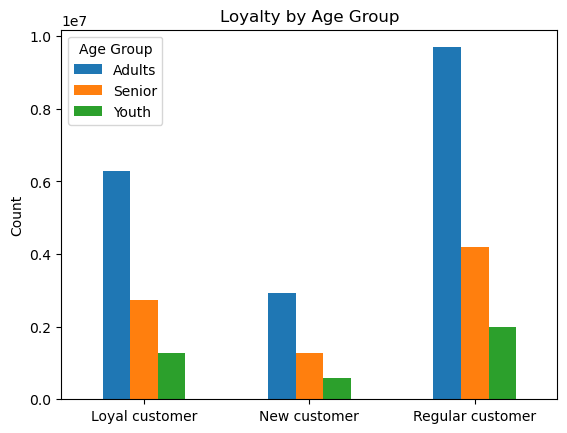

In [85]:
# Visualize a bar chart for the crosstab between loyalty_flag and Age Group
LoyaltyAgeGroup_BarChart = Crosstab_LoyaltyAgeGroup.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [89]:
# Export the Bar Chart
LoyaltyAgeGroup_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'LoyaltyAgeGroup_BarChart.png'))

Using crosstab on Department_id and Age Group

In [92]:
#Adding new column with names of the department for better readability

department_name = []

for value in df_merged_change['department_id']:
    if value == 1:
        department_name.append('frozen')
    elif value == 2:
        department_name.append('other')
    elif value == 3:
        department_name.append('bakery')
    elif value == 4:
        department_name.append('produce')
    elif value == 5:
        department_name.append('alcohol')
    elif value == 6:
        department_name.append('international')
    elif value == 7:
        department_name.append('beverages')
    elif value == 8:
        department_name.append('pets')
    elif value == 9:
        department_name.append('dry goods pasta')
    elif value == 10:
        department_name.append('bulk')
    elif value == 11:
        department_name.append('personal care')
    elif value == 12:
        department_name.append('meat seafood')
    elif value == 13:
        department_name.append('pantry')
    elif value == 14:
        department_name.append('breakfast')
    elif value == 15:
        department_name.append('canned goods')
    elif value == 16:
        department_name.append('dairy eggs')
    elif value == 17:
        department_name.append('household')
    elif value == 18:
        department_name.append('babies')
    elif value == 19:
        department_name.append('snacks')
    elif value == 20:
        department_name.append('deli')
    elif value == 21:
        department_name.append('missing')
    else:
        department_name.append('Not enough information')


df_merged_change['department_name'] = department_name

C:\Users\beaac\AppData\Local\Temp\ipykernel_3320\3167997791.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_change['department_name'] = department_name


In [93]:
Crosstab_DepartmentAgeGroup = pd.crosstab(df_merged_change['department_name'], df_merged_change['Age Group'],dropna = False)

In [94]:
Crosstab_DepartmentAgeGroup

Age Group,Adults,Senior,Youth
department_name,,,
alcohol,88746,36693,19188
babies,252954,106204,51234
bakery,684958,295997,139873
beverages,1569538,684020,318343
breakfast,410077,175296,85477
bulk,20200,8945,4306
canned goods,618253,267509,126312
dairy eggs,3161617,1368072,647493
deli,614080,265199,124555


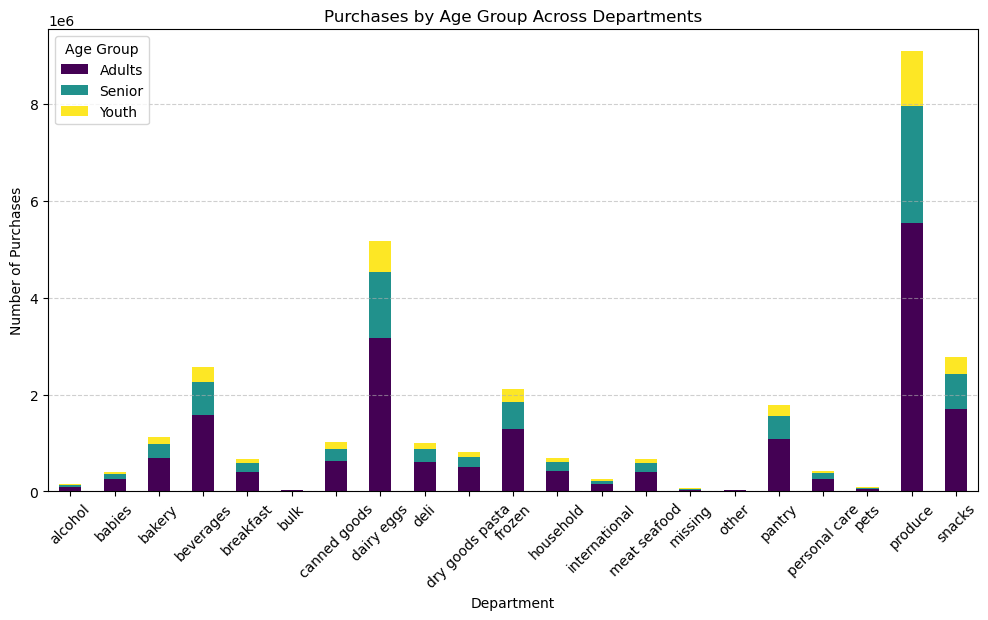

In [95]:

# Set figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart
Crosstab_DepartmentAgeGroup.plot(kind="bar", stacked=True, colormap="viridis", ax=ax)

# Formatting
ax.set_title("Purchases by Age Group Across Departments")
ax.set_xlabel("Department")
ax.set_ylabel("Number of Purchases")
ax.legend(title="Age Group")

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


Produce is the most purchased category across all age groups, with over 5.5 million purchases from adults alone.

Dairy & Eggs is also widely purchased, indicating it’s a staple for consumers.

Snacks & Beverages have strong engagement from youth, showing preferences for quick and accessible food items.

In [101]:
fig.savefig(os.path.join(path, "04 Analysis", "Visualizations", "Stacked_Bar_Chart.png"))

Use Aggregation functions on customer profile level for usage freqquency and expenditure

In [104]:
# Using a group by statement in order to aggregate data for the customer population 

Customer_profile_group= df_merged_change . groupby('Income Group').agg({'prices': ['max', 'min','mean']})

In [105]:
Customer_profile_group

prices               
                max  min      mean
Income Group                      
HIGH           25.0  1.0  7.940855
LOW            25.0  1.0  6.707347
MIDDLE         25.0  1.0  7.919577

In [108]:
# Using a group by statement in order to aggregate data for the customer population for frequency 

Customer_profile_group1 = df_merged_change . groupby('Income Group').agg({'order_number': ['max', 'min','mean'], 'days_since_prior_order': ['max','min','mean']})

In [110]:
Customer_profile_group1 

order_number                days_since_prior_order       \
                      max min       mean                    max  min   
Income Group                                                           
HIGH                   99   1  18.078212                   30.0  0.0   
LOW                    99   1  16.835516                   30.0  0.0   
MIDDLE                 99   1  17.935687                   30.0  0.0   

                         
                   mean  
Income Group             
HIGH          10.123102  
LOW           10.528791  
MIDDLE        10.205594

Compare your customer profiles with Regions and Departments

In [113]:
#Using crosstab function on Region and Departments
Cross_region_departments= pd.crosstab(df_merged_change['Region'], df_merged_change['department_name'], dropna= False)

In [114]:
Cross_region_departments

department_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


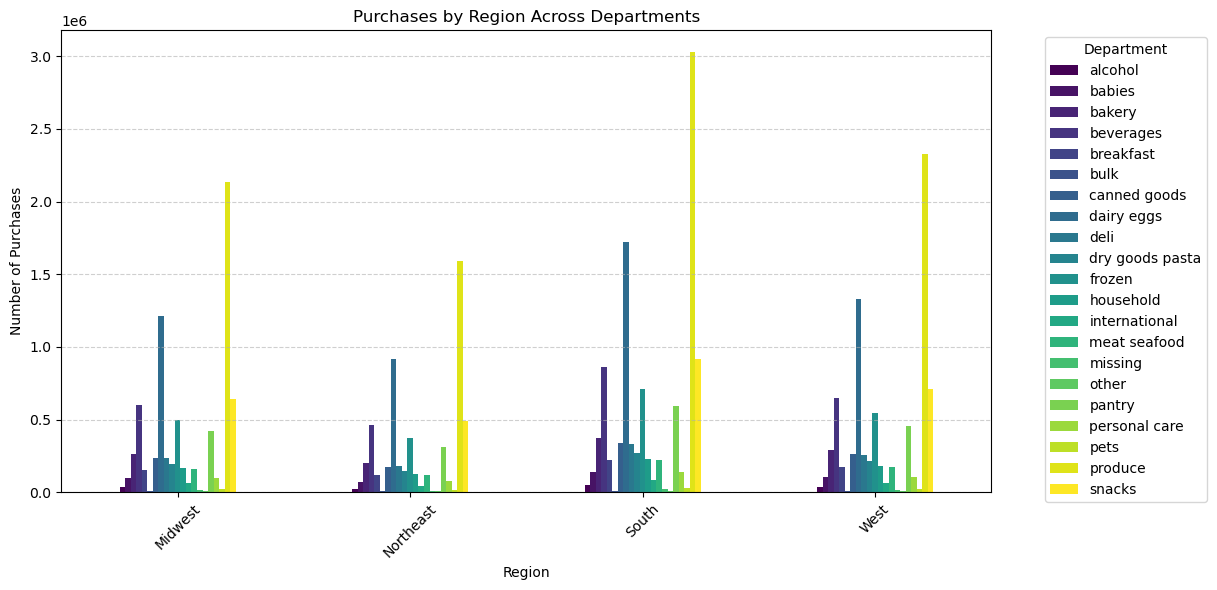

In [115]:
#Visualize Grouped bar chart of cross_region_departments

# Set figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot grouped bar chart
Cross_region_departments.plot(kind="bar", colormap="viridis", ax=ax)

# Formatting
ax.set_title("Purchases by Region Across Departments")
ax.set_xlabel("Region")
ax.set_ylabel("Number of Purchases")
ax.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


In [119]:
fig.savefig(os.path.join(path, "04 Analysis", "Visualizations", "Purchases_By_Regions_Across_Departments.png"))

Regional Preferences:

Some regions, like the Northeast and Midwest, have noticeably higher purchases in specific departments.

The South and West may have different dominant categories—perhaps influenced by lifestyle or store availability.

Department Trends Across Locations:

Produce, dairy/eggs, and snacks appear to have significant purchases across all regions.

Alcohol and bakery might show more variation depending on location.

Visualizations 

In [123]:
#Visualize orders by dy of week
DOW_barchart= df_merged_change['orders_day_of_week'].value_counts()

In [125]:
DOW_barchart

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

Text(0.5, 0, '')

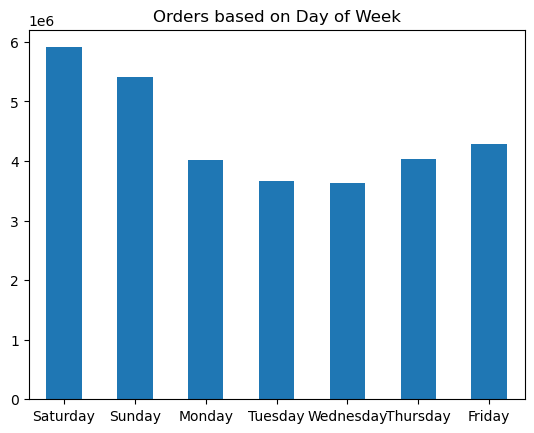

In [127]:
# Visualize a Bar Chart of orders by Day of Week
DOW_barchart= df_merged_change['orders_day_of_week'].value_counts().sort_index().plot.bar()
OrdersBarChart_DayOfWeek = DOW_barchart.set_title('Orders based on Day of Week')
DOW_barchart.set_xticklabels([ 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
DOW_barchart.set_xlabel("")

In [129]:
# Export the bar chart
OrdersBarChart_DayOfWeek.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'OrdersBarChart_DayOfWeek.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

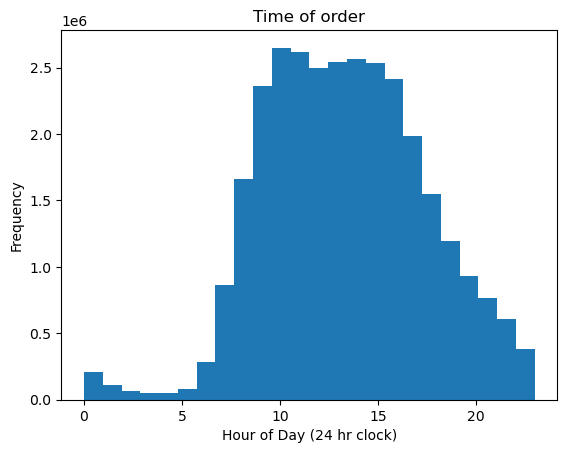

In [131]:
# Visualize a histogram for Time of Order 
TimeOfDay_Histogram = df_merged_change['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Time of order')
plt.xlabel('Hour of Day (24 hr clock)')

In [133]:
# Export the histogram
TimeOfDay_Histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'TimeOfDay_Histogram.png'))

In [135]:
# Check Value counts for family status
FamilyStatus= df_merged_change['marital_status'].value_counts(dropna= False)

In [136]:
FamilyStatus

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

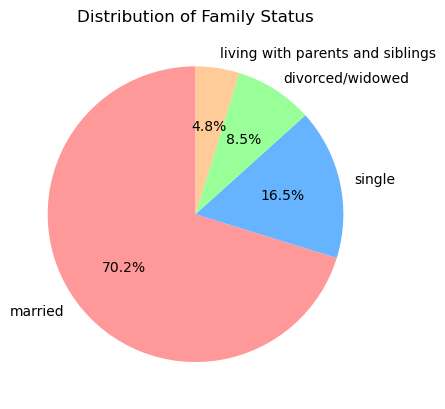

In [139]:
# Visualize a pie chart
PieChart_FamilyStatus = FamilyStatus.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
# Hide the y-label
plt.ylabel('')  
plt.title('Distribution of Family Status')
plt.show()

In [141]:
# Export the histogram
PieChart_FamilyStatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FamilyStatus_PieChart.png'))

In [143]:
# Using Crosstab function on loyalty with income group
Cross_LoyaltyIncome = pd.crosstab(df_merged_change['loyalty_flag'], df_merged_change['Income Group'], dropna = False)

In [145]:
Cross_LoyaltyIncome

Income Group,HIGH,LOW,MIDDLE
loyalty_flag,,,
Loyal customer,1310941,1032934,7940218
New customer,575272,627180,3601243
Regular customer,2008321,1702440,12166015


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

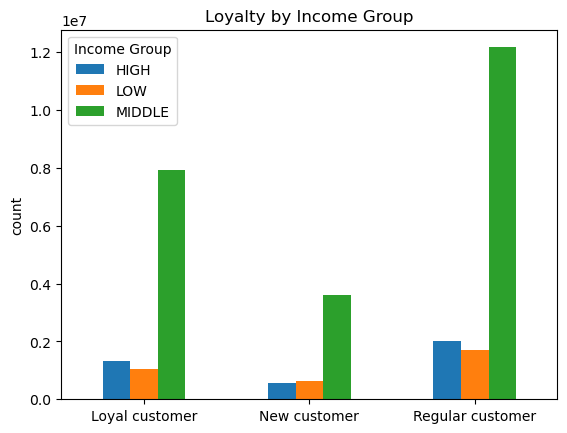

In [147]:
# Visualize a bar chart on loyalty across different Income  Groups
BarChart_LoyaltyIncome = Cross_LoyaltyIncome.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [149]:
# Export the Bar Chart
BarChart_LoyaltyIncome.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_group_bar.png'))

In [153]:
# Using Crosstab function on loyalty with Family Status
Cross_LoyaltyFamilyStatus = pd.crosstab(df_merged_change['loyalty_flag'], df_merged_change['marital_status'], dropna = False)

In [155]:
Cross_LoyaltyFamilyStatus

marital_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,403781,221779,3380651,797484
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

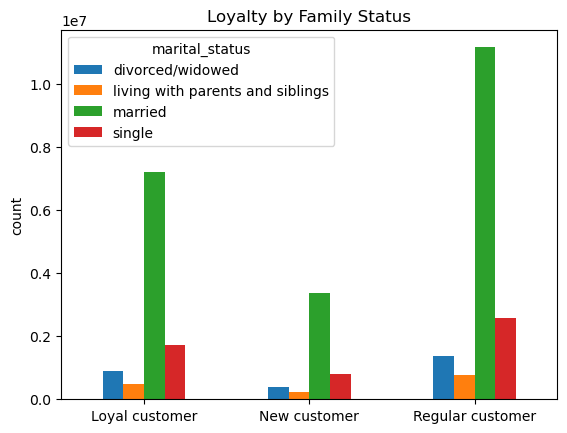

In [157]:
# Visualize a Bar Chart Loyalty across different family status of customers
BarChart_LoyaltyFamilyStatus = Cross_LoyaltyFamilyStatus.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [159]:
# Export the Bar Chart
BarChart_LoyaltyFamilyStatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'BarChart_LoyaltyFamilyStatus.png'))

In [173]:
#Visualize Prince range
Price_Range= df_merged_change['prices_range_loc'].value_counts(dropna = False)

In [175]:
Price_Range

prices_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

C:\Users\beaac\AppData\Local\Temp\ipykernel_3320\1399979351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_change['prices_range_loc'] = pd.Categorical(df_merged_change['prices_range_loc'], categories=ordered_categories, ordered=True)


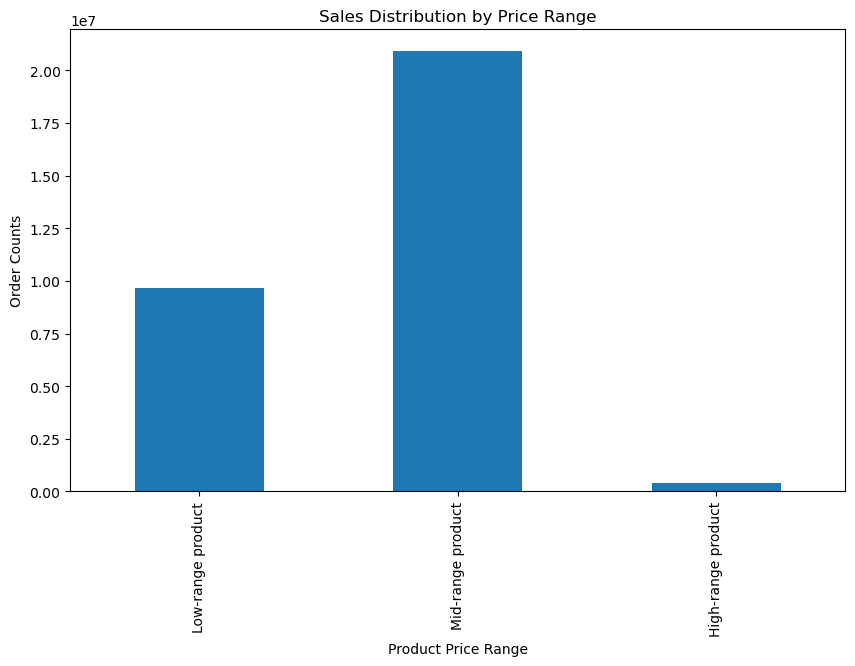

In [185]:
# Define ordered categories
ordered_categories = ['Low-range product', 'Mid-range product', 'High-range product']

# Use Categorical data type to enforce the order
df_merged_change['prices_range_loc'] = pd.Categorical(df_merged_change['prices_range_loc'], categories=ordered_categories, ordered=True)

# Create the plot
plt.figure(figsize=(10, 6))
df_merged_change['prices_range_loc'].value_counts().sort_index().plot(kind='bar')

# Set title and labels
plt.title('Sales Distribution by Price Range')
plt.xlabel('Product Price Range')
plt.ylabel('Order Counts')

# Display the plot
plt.show()


In [187]:
plt.gcf().savefig(os.path.join(path, '04 Analysis', 'Visualizations', '5 4.10 bar_sales_product_ranges.png'))

<Figure size 640x480 with 0 Axes>

In [189]:
#Exporting final merged dataframe
df_merged_change.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 customer_ords_prods.pkl'))